## Diagrama de coordenadas paralelas
Gráfico con el que podemos comparar varias observaciones **individuales** a través de los valores de sus variables. Es un gráfico que solo consiste en múltiples Ejes Y. Cada Eje representa el rango de una variable de interés. Los valores que tomas las variables de una misma observación se conectan con líneas. De este modo podemos hallar como se encuentran relacionadas las variables. 
**Ejes Y**: Variable numérica o categórica.

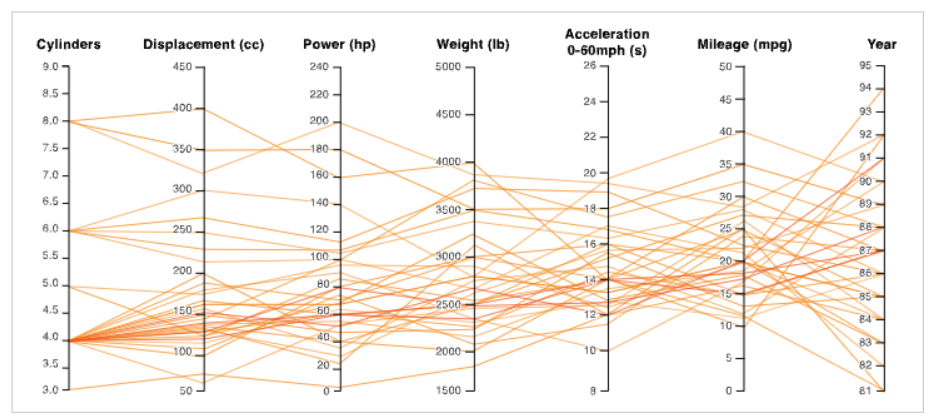


### Cuando utilizar
- Cuando quiero comparar como se relacionan diversas variables numéricas de observaciones individuales.
- Es una alternativa superior al Radar Chart, ya que no imoprta la escala de mis variables.

### Consejos
- Puedo introducir una variable diferenciadora categórica que quiera explorar diferentes colores en las líneas.
- Si tengo muchos puntos puede volverse difícil de entender. Para solucionar esto puedo muestrear observaciones o jugar con las opacidades de las líneas.
- Es un gráfico con usos limitados ya que facilmente se vuelve complejo de entender y caótico debido a la gran cantidad de líneas.

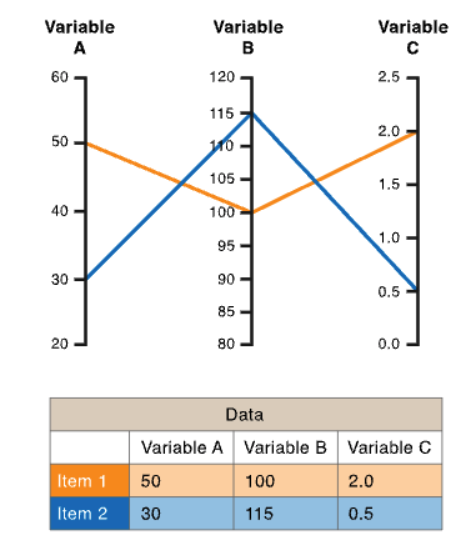

## En esta clase

### Datos
Información sobre especies de pingüinos.

### Objetivos
1. Cómo se comparan las medidas de los pingüinos de diferentes especies.

## Referencias
- https://datavizcatalogue.com/ES/metodos/grafico_de_coordenadas_paralelas.html
- https://plotly.com/python/parallel-coordinates-plot/
- https://plotly.com/python/builtin-colorscales/
- https://github.com/lkuffo/data-viz/blob/main/NIVEL2/10_coordenadas.ipynb

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/pinguinos.csv')
df = df.dropna()
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
import plotly.express as px

In [4]:
fig = px.parallel_coordinates(
    df,
    dimensions=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
)
fig.show()

En algunas ocasiones se hace necesario darle un valor numérico a variables categóricas. A continuacion se muestra un ejemplo con la columna *species*

In [6]:
df['species_id'] = df['species'].astype('category').cat.codes
df.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_id
309,Gentoo,Biscoe,52.1,17.0,230.0,5550.0,MALE,2
89,Adelie,Dream,38.9,18.8,190.0,3600.0,FEMALE,0
311,Gentoo,Biscoe,52.2,17.1,228.0,5400.0,MALE,2
163,Chinstrap,Dream,51.7,20.3,194.0,3775.0,MALE,1
199,Chinstrap,Dream,49.0,19.6,212.0,4300.0,MALE,1
230,Gentoo,Biscoe,40.9,13.7,214.0,4650.0,FEMALE,2
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,MALE,1
333,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,MALE,2
326,Gentoo,Biscoe,41.7,14.7,210.0,4700.0,FEMALE,2
207,Chinstrap,Dream,52.2,18.8,197.0,3450.0,MALE,1


In [12]:
fig = px.parallel_coordinates(
    df,
    color = 'species_id',
    dimensions=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'],
    color_continuous_scale=px.colors.diverging.Tealrose
)
fig.show()